In [35]:
from sklearn import datasets
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
#loading data
digits = datasets.load_digits()

In [3]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [4]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [5]:
digits.data.shape

(1797, 64)

In [6]:
digits.images.shape

(1797, 8, 8)

In [7]:
digits.images[:2]

array([[[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
        [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
        [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
        [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
        [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
        [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
        [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
        [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.],
        [ 0.,  0.,  0., 11., 16.,  9.,  0.,  0.],
        [ 0.,  0.,  3., 15., 16.,  6.,  0.,  0.],
        [ 0.,  7., 15., 16., 16.,  2.,  0.,  0.],
        [ 0.,  0.,  1., 16., 16.,  3.,  0.,  0.],
        [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
        [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
        [ 0.,  0.,  0., 11., 16., 10.,  0.,  0.]]])

In [9]:
digits.target[:40]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1,
       2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9])

In [10]:
img = digits.images[0]
img.shape

(8, 8)

In [11]:
print(img)

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


In [12]:
#check missing data

In [13]:
print(np.isnan(digits.images).sum())

0


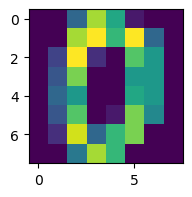

In [14]:
img = digits.images[1796]
img = digits.images[0]

plt.figure(figsize=(2, 2))
plt.imshow(img) 
plt.show()

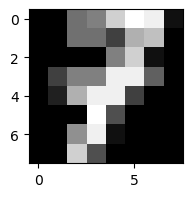

In [15]:
img = digits.images[7]
plt.figure(figsize=(2, 2))
plt.imshow(img, cmap=plt.cm.gray)
plt.show()

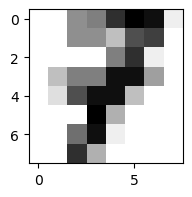

In [16]:
plt.figure(figsize=(2, 2))
plt.imshow(img, cmap=plt.cm.gray_r)
plt.show()

In [17]:
def visual_multi(i):
    '''Plots 15 digits, starting with digit i'''
    nplots = 40
    fig = plt.figure(figsize=(8, 4)) 
    for j in range(nplots):
        plt.subplot(4, 10, j+1)
        plt.imshow(digits.images[i+j], cmap=plt.cm.gray_r)
        plt.title(digits.target[i+j])
        plt.xticks([]); plt.yticks([])
    plt.show()

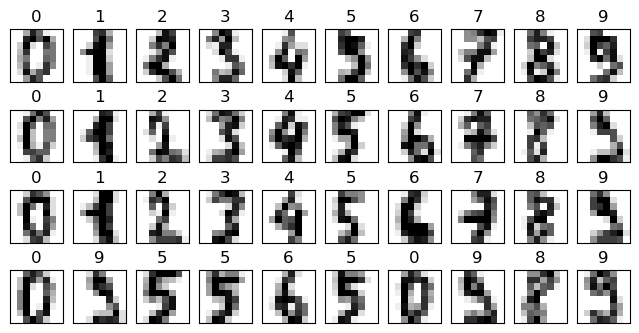

In [18]:
visual_multi(0)

In [19]:
#prepare data

In [20]:
n_samples = len(digits.images)  #
n_samples

1797

In [21]:
X = digits.images.reshape((n_samples, -1))
X[:2]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
        15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.]])

In [22]:
y = digits.target
y[:20]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X, y, test_size=0.4, random_state=20) # 
X_train.shape , X_test.shape

((1078, 64), (719, 64))

In [24]:
#Train and test

In [28]:
from sklearn import svm 

model = svm.SVC(gamma='scale')

In [29]:
model.fit(X_train, y_train)

SVC()

In [30]:
y_pred = model.predict(X_test)
y_pred[:20]

array([0, 7, 9, 5, 8, 1, 3, 3, 7, 0, 9, 4, 7, 4, 0, 1, 1, 8, 1, 3])

In [31]:
y_test[:20]

array([0, 7, 9, 5, 8, 1, 3, 3, 7, 0, 9, 4, 7, 4, 0, 1, 1, 8, 1, 3])

In [32]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9819193324061196

In [33]:
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print('Accuracy Score: {:.4f}'.format(accuracy_score(y_test, y_pred)))

print(classification_report(y_test, y_pred)) 

cm = confusion_matrix(y_test, y_pred)
print(cm)

Accuracy Score: 0.9819
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        63
           1       1.00      1.00      1.00        75
           2       1.00      1.00      1.00        63
           3       1.00      0.95      0.97        80
           4       1.00      0.99      0.99        75
           5       0.96      0.99      0.97        71
           6       1.00      0.99      0.99        71
           7       0.95      0.99      0.97        80
           8       0.94      1.00      0.97        64
           9       0.97      0.94      0.95        77

    accuracy                           0.98       719
   macro avg       0.98      0.98      0.98       719
weighted avg       0.98      0.98      0.98       719

[[63  0  0  0  0  0  0  0  0  0]
 [ 0 75  0  0  0  0  0  0  0  0]
 [ 0  0 63  0  0  0  0  0  0  0]
 [ 0  0  0 76  0  1  0  1  2  0]
 [ 0  0  0  0 74  0  0  0  1  0]
 [ 0  0  0  0  0 70  0  0  0  1]
 [ 0  0  0  0  0  1 

In [37]:
!pip install scikit-plot

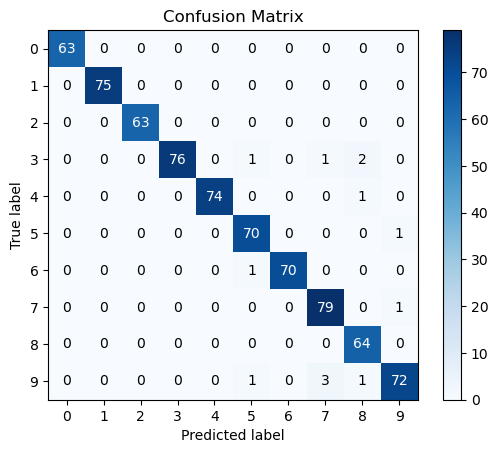

In [38]:
import scikitplot as skplot
skplot.metrics.plot_confusion_matrix(y_test, y_pred)
plt.savefig('digit-cm2.png', dpi=120)
plt.show()

In [39]:
idx_miss = np.where(y_test != y_pred)
idx_miss

(array([ 98, 111, 268, 338, 351, 427, 434, 449, 470, 523, 562, 638, 657]),)

In [40]:
y_test[idx_miss]

array([9, 5, 3, 4, 9, 3, 6, 7, 3, 3, 9, 9, 9])

In [41]:
y_pred[idx_miss]

array([8, 9, 8, 8, 5, 5, 5, 9, 7, 8, 7, 7, 7])

In [42]:
X_test[idx_miss][0]

array([ 0.,  0.,  2., 10., 16., 11.,  1.,  0.,  0.,  0., 13., 13., 10.,
       16.,  8.,  0.,  0.,  4., 14.,  1.,  8., 14.,  1.,  0.,  0.,  4.,
       15., 12., 15.,  8.,  0.,  0.,  0.,  0.,  6.,  7., 14.,  5.,  0.,
        0.,  0.,  1.,  2.,  0., 12.,  5.,  0.,  0.,  0.,  8., 15.,  6.,
       13.,  4.,  0.,  0.,  0.,  0.,  5., 11., 16.,  3.,  0.,  0.])

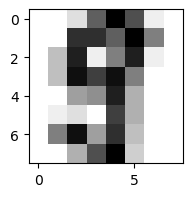

In [43]:
fig = plt.figure(figsize=(2, 2)) # 
plt.imshow(X_test[idx_miss][0].reshape(8,8), cmap=plt.cm.gray_r)
plt.show()

In [45]:
#worng prediction imgage

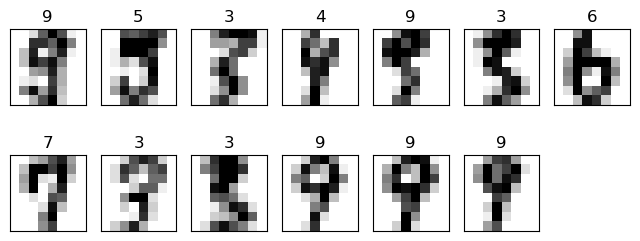

In [44]:
fig = plt.figure(figsize=(8, 3)) 
for j,k in enumerate(idx_miss[0]):

    plt.subplot(2, 7, j+1)
    plt.imshow(X_test[k].reshape(8,8), cmap=plt.cm.gray_r)
    plt.title(y_test[k])
    plt.xticks([])
    plt.yticks([])

plt.show()

In [46]:
#Cross validation

In [47]:
from sklearn.model_selection import cross_val_score

model = svm.SVC(gamma='scale')

cvs = cross_val_score(model, X, y, cv=10) 
print(cvs.round(4))
cvs.mean().round(4)

[0.9444 0.9889 0.9278 0.9667 0.9833 0.9889 0.9889 0.9944 0.9609 0.9553]


0.97

In [48]:
#compare any algorithm

In [49]:
from sklearn.tree import DecisionTreeClassifier

In [50]:
model = DecisionTreeClassifier(max_depth=10)
cvs = cross_val_score(model, X, y, cv=10)
print(cvs.round(4))
cvs.mean().round(4)

[0.7778 0.8389 0.8389 0.7889 0.7722 0.9111 0.9056 0.838  0.7821 0.8045]


0.8258

In [51]:
#Decision tree have less accuracy than SVM

In [52]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

In [53]:
# Naive Bayes
naive_bayes_model = GaussianNB()
cvs_nb = cross_val_score(naive_bayes_model, X, y, cv=10)
print("Naive Bayes Cross-Validation Scores:")
print(cvs_nb.round(4))
print("Mean Cross-Validation Score:", cvs_nb.mean().round(4))
print()


Naive Bayes Cross-Validation Scores:
[0.7611 0.8167 0.9056 0.6833 0.7389 0.8389 0.8667 0.8659 0.8268 0.8101]
Mean Cross-Validation Score: 0.8114



In [56]:
from PIL import Image

In [58]:
import numpy as np
from PIL import Image, ImageOps

model = svm.SVC(gamma='scale')
model.fit(X, y)

imgfile = 'digit1.jpg'

img = Image.open(imgfile).convert('L') 
img = ImageOps.invert(img)
img = img.resize((8, 8), Image.LANCZOS)

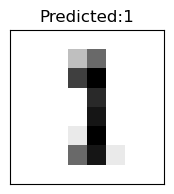

In [62]:
pixel = np.array(img)  # 8x8
pixel = pixel / 255.0 * 16
pixel = pixel.astype('int')

my_digit = pixel.reshape(1, -1)  # 1x64
predicted = model.predict(my_digit)

plt.figure(figsize=(2, 2))
plt.imshow(pixel, cmap=plt.cm.gray_r)
plt.title('Predicted:{}'. format(predicted[0]))
plt.xticks([])
plt.yticks([])

plt.show()

In [63]:
pixel
my_digit

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  3,  7,  0,  0,  0,
         0,  0,  0,  9, 12,  0,  0,  0,  0,  0,  0,  0, 10,  0,  0,  0,
         0,  0,  0,  0, 11,  0,  0,  0,  0,  0,  0,  1, 12,  0,  0,  0,
         0,  0,  0,  7, 11,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0]])

/var/folders/_f/lgdnzxm94sqg34l7c05bftnh0000gn/T/ipykernel_90724/3894155617.py:7: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((8, 8), Image.ANTIALIAS)


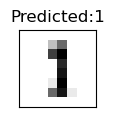

/var/folders/_f/lgdnzxm94sqg34l7c05bftnh0000gn/T/ipykernel_90724/3894155617.py:7: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((8, 8), Image.ANTIALIAS)


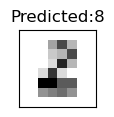

/var/folders/_f/lgdnzxm94sqg34l7c05bftnh0000gn/T/ipykernel_90724/3894155617.py:7: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((8, 8), Image.ANTIALIAS)


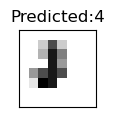

/var/folders/_f/lgdnzxm94sqg34l7c05bftnh0000gn/T/ipykernel_90724/3894155617.py:7: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((8, 8), Image.ANTIALIAS)


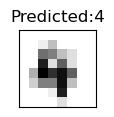

/var/folders/_f/lgdnzxm94sqg34l7c05bftnh0000gn/T/ipykernel_90724/3894155617.py:7: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((8, 8), Image.ANTIALIAS)


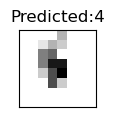

/var/folders/_f/lgdnzxm94sqg34l7c05bftnh0000gn/T/ipykernel_90724/3894155617.py:7: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((8, 8), Image.ANTIALIAS)


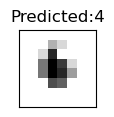

/var/folders/_f/lgdnzxm94sqg34l7c05bftnh0000gn/T/ipykernel_90724/3894155617.py:7: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((8, 8), Image.ANTIALIAS)


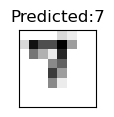

/var/folders/_f/lgdnzxm94sqg34l7c05bftnh0000gn/T/ipykernel_90724/3894155617.py:7: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((8, 8), Image.ANTIALIAS)


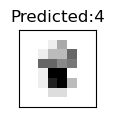

/var/folders/_f/lgdnzxm94sqg34l7c05bftnh0000gn/T/ipykernel_90724/3894155617.py:7: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((8, 8), Image.ANTIALIAS)


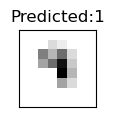

/var/folders/_f/lgdnzxm94sqg34l7c05bftnh0000gn/T/ipykernel_90724/3894155617.py:7: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((8, 8), Image.ANTIALIAS)


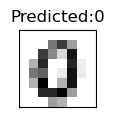

In [65]:
import numpy as np
from PIL import Image, ImageOps

def predict_digit(imgfile):
    img = Image.open(imgfile).convert('L') 
    img = ImageOps.invert(img)
    img = img.resize((8, 8), Image.ANTIALIAS)  


    pixel = np.array(img)
    pixel = pixel / 255.0 * 16
    pixel = pixel.astype('int')
    
    my_digit = pixel.reshape(1, -1)
    predicted = model.predict(my_digit)
    
    plt.figure(figsize=(1,1))
    plt.imshow(pixel, cmap=plt.cm.gray_r)
    plt.title('Predicted:{}'. format(predicted[0]))
    plt.xticks([])
    plt.yticks([])    
    plt.show()

imgfiles = ['digit1.jpg','digit2.jpg','digit3.jpg','digit4.jpg','digit5.jpg',
            'digit6.jpg','digit7.jpg','digit8.jpg','digit9.jpg','digit0.jpg']
for i in imgfiles:
    predict_digit(i)